# Day 2
## 지도 학습의 종류

### 분류  : 이진 분류 (pos/neg) -> 정확한 구분이 필요
### 회귀  : 예측(ex: 특정한 숫자/통계치) -> 임계치에 근접한 값이여도 상관없음


## 일반화, 과대적합, 과소적합

### 일반화 : 우리가 만드려는 이상적인 모델

### 훈련 데이터만 이용해서 데이터 생성시, 데이터의 양에 따라 과대적합/과소적합 발생
#### 과대적합 : 훈련데이터만 잘처리 -> 훈련 데이터를 대상으로한 학습에 염두를 두고 복잡한 모델을 형성한 결과, 훈련데이터 이외의 데이터에 대해 유연하게 대처할 수 없음
#### 과소적합 : 훈련데이터도 잘못함 -> 훈련 데이터를 너무 간단하게 만들어서 훈련데이터의 일부도 인식의 문재가 있음

## 모델의 복잡도 -> 다양한 데이터를 모으는 것이 중요!!  (양과 질 모두 충족시켜야함)

In [17]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shpae :  (26, 2)


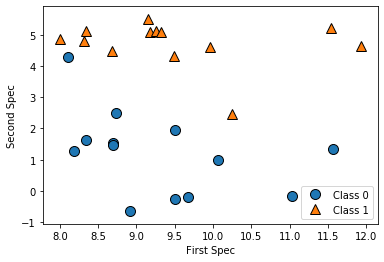

In [52]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Spec")
plt.ylabel("Second Spec")
print("X.shpae : ", X.shape)

Text(0, 0.5, 'Target')

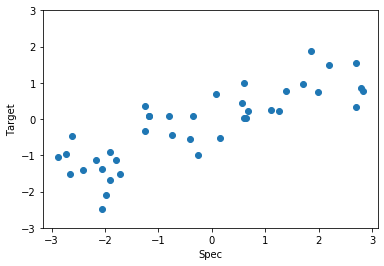

In [19]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Spec")
plt.ylabel("Target")

### K-NN 알고리즘을 이용한 간단한 예제

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


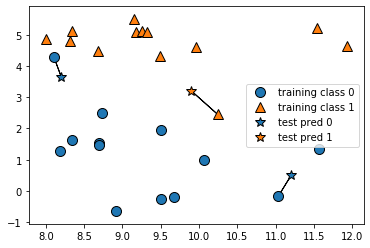

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
print("Test Set Prediction : \n", clf.predict(X_test))

Test Set Prediction : 
 [1 0 1 0 1 0 0]


In [38]:
print("Test Set Accuracy : {:.2f}".format(clf.score(X_test,y_test)))

Test Set Accuracy : 0.86


### K-NN 회귀 알고리즘을 이용한 예제

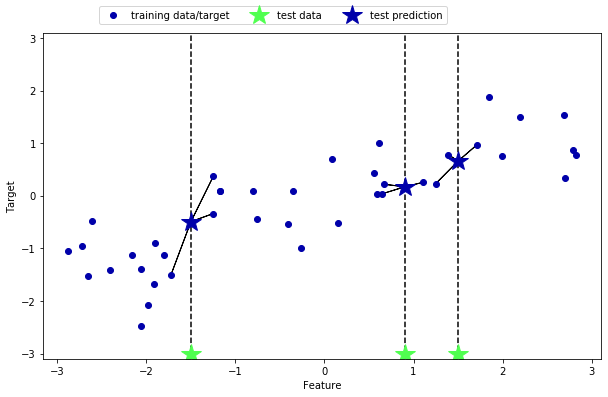

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [29]:
# 코드를 통한 KNN 회귀 테스트
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [30]:
print("Test Set Prediction :\n", reg.predict(X_test))

Test_Set Prediction :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [32]:
print("Test Set R^2 : {:.2f}".format(reg.score(X_test, y_test)))

Test Set R2 : 0.83


### KNN은 데이터의 전처리를 통해 성능을 향상 시킬수 있다.
#### 예를 들어 서로 다른 종류의 데이터 두개를 각각 정규화하여 0~1 사이의 값으로 만듬(두 데이터 값의 차가 클때)



### 선형 모델

w[0]: 0.393906  b: -0.031804


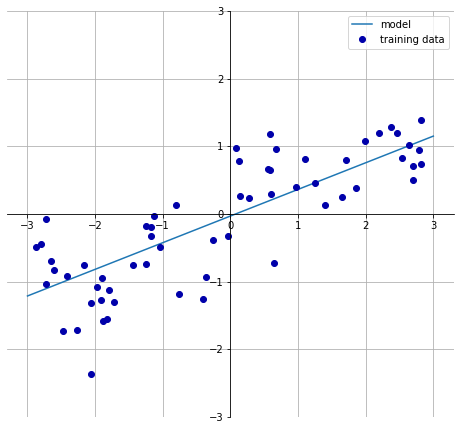

In [49]:
#y = ax + b -> 속성의 갯수에 따라 미지수의 갯수가 달라짐
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)

In [57]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

print("Train Set Score : {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746
Train Set Score : 0.67
Test Set Score : 0.66


In [59]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Train Set Score : {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(lr.score(X_test, y_test)))

Train Set Score : 0.95
Test Set Score : 0.61


### 릿지 회귀
#### alpha 값이 작아지면  가중치 값이 커짐 -> 선형회귀에 가까워짐

In [61]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Train Set Score : {:.2f}".format(ridge.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(ridge.score(X_test, y_test)))

Train Set Score : 0.89
Test Set Score : 0.75


In [62]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train Set Score : {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(ridge10.score(X_test, y_test)))

Train Set Score : 0.79
Test Set Score : 0.64


In [63]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Train Set Score : {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(ridge01.score(X_test, y_test)))

Train Set Score : 0.93
Test Set Score : 0.77


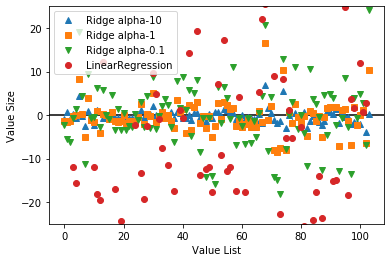

In [65]:
#coef_ : 기울기
plt.plot(ridge10.coef_, '^', label="Ridge alpha-10")
plt.plot(ridge.coef_, 's', label="Ridge alpha-1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha-0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Value List")
plt.ylabel("Value Size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

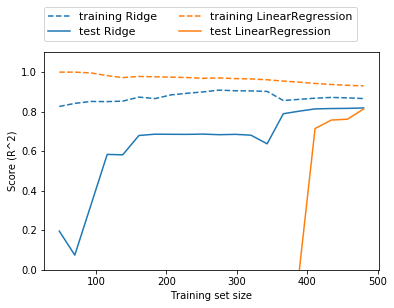

In [69]:
mglearn.plots.plot_ridge_n_samples()
#선형회귀의 경우 테스트의 셋의 크기가 최소 400은 되야 성능이 나옴
#릿지의 경우 테스트 셋이 100 정도만 되도 성능이 나오기 시작
#데이터가 충분히 주어지면 둘의 성능은 같아진다

### 라쏘(lasso)
#### Ridge의 대안으로 사용, L1 규제(계수의 절대값의 합을 패널티)로 하여 계수를 0에 가깝게 함
#### 패널티를 통해 일부값을 0으로 만들어 완전히 제외하는 특성 선택을 행함(특성 선택의 한가지 방법)

In [71]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Train Set Score : {:.2f}".format(lasso.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(lasso.score(X_test, y_test)))
print("Using Feature : ", np.sum(lasso.coef_ != 0))
#alpha가 1.0인 경우 성능이 나쁜편

Train Set Score : 0.29
Test Set Score : 0.21
Using Feature :  4


In [72]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)
print("Train Set Score : {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(lasso001.score(X_test, y_test)))
print("Using Feature : ", np.sum(lasso001.coef_ != 0))

Train Set Score : 0.90
Test Set Score : 0.77
Using Feature :  33


In [73]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print("Train Set Score : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Using Feature : ", np.sum(lasso00001.coef_ != 0))

Train Set Score : 0.95
Test Set Score : 0.64
Using Feature :  96


Text(0, 0.5, 'Value Size')

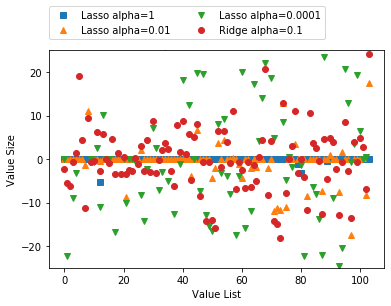

In [76]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Value List")
plt.ylabel("Value Size")